In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [ ]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print (diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [ ]:
# Save the input and target variables
# Print(diabetes_dataset.keys())
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

In [ ]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0))/targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [ ]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


#### Train a feedforward neural network model

In [ ]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
  model = Sequential([
        Dense(128, activation = "relu", input_shape=(train_data.shape[1],)),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),
        Dense(128, activation="relu"),  # Would look better to loop with model.add?
        Dense(1)
        ])
  return model
  
model = get_model()

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_30 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_31 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_32 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                

In [ ]:
model.compile(optimizer = "adam", loss="mse", metrics=["mae"])

In [ ]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, 
                    validation_split=0.15, batch_size=64, verbose=False)

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.8869 - mae: 0.7174


[0.8869078755378723, 0.7174428105354309]

#### Plot the learning curves

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

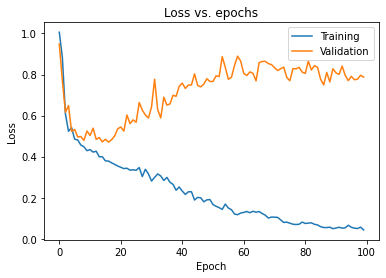

In [ ]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [ ]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [ ]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss = "mse", metrics=["mae"])

In [ ]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, epochs=100, 
                    validation_split=0.15, batch_size=64, verbose=False)

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5705 - mae: 0.5932


[0.5705336928367615, 0.593226432800293]

#### Plot the learning curves

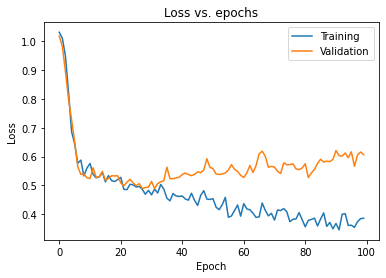

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [ ]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):

  def on_train_begin(self, logs=None):
    print("Starting training.....")

  def on_epoch_begin(self, epoch, logs=None):
    print(f"Starting epoch {epoch}")

  def on_train_batch_begin(self, batch, logs=None):
    print(f"Training: Starting batch {batch}")

  def on_train_batch_end(self, batch, logs=None):
    print(f"Training: Finishing batch {batch}")

  def on_epoch_end(self, epoch, logs=None):
    print(f"Finished epoch {epoch}")

  def on_train_end(self, log):
    print("Finished Training!")

class TestingCallback(Callback):

  def on_test_begin(self, logs=None):
    print("Starting training.....")

  def on_test_batch_begin(self, batch, logs=None):
    print(f"Training: Starting batch {batch}")

  def on_test_batch_end(self, batch, logs=None):
    print(f"Training: Finishing batch {batch}")

  def on_test_end(self, log):
    print("Finished testing!")

class PredictionCallback(Callback):

  def on_predict_begin(self, logs=None):
    print("Starting prediction.....")

  def on_test_batch_begin(self, batch, logs=None):
    print(f"Prediction: Starting batch {batch}")

  def on_test_batch_end(self, batch, logs=None):
    print(f"Prediction: Finishing batch {batch}")

  def on_test_end(self, log):
    print("Finished prediction!")

In [ ]:
# Re-build the model
model = get_regularised_model(1e-5, 0.3)

In [ ]:
# Compile the model
model.compile(optimizer="adam", loss = "mse")

#### Train the model with the callback

In [ ]:
# Train the model, with some of the data reserved for validation
model.fit(train_data, train_targets, epochs = 3, batch_size=128, verbose=False, callbacks=[TrainingCallback()])

Starting training.....
Starting epoch 0
Training: Starting batch 0
Training: Finishing batch 0
Training: Starting batch 1
Training: Finishing batch 1
Training: Starting batch 2
Training: Finishing batch 2
Training: Starting batch 3
Training: Finishing batch 3
Finished epoch 0
Starting epoch 1
Training: Starting batch 0
Training: Finishing batch 0
Training: Starting batch 1
Training: Finishing batch 1
Training: Starting batch 2
Training: Finishing batch 2
Training: Starting batch 3
Training: Finishing batch 3
Finished epoch 1
Starting epoch 2
Training: Starting batch 0
Training: Finishing batch 0
Training: Starting batch 1
Training: Finishing batch 1
Training: Starting batch 2
Training: Finishing batch 2
Training: Starting batch 3
Training: Finishing batch 3
Finished epoch 2
Finished Training!


In [ ]:
# Evaluate the model
model.evaluate(test_data, test_targets, verbose=False, callbacks=[TestingCallback()])

Starting training.....
Training: Starting batch 0
Training: Finishing batch 0
Training: Starting batch 1
Training: Finishing batch 1
Finished testing!


0.7334040403366089

In [ ]:
# Make predictions with the model
model.predict(test_data, verbose=False, callbacks=[PredictionCallback()])

Starting prediction.....


array([[ 0.06495956],
       [ 0.0432703 ],
       [-0.0057613 ],
       [-0.08741153],
       [-0.05899705],
       [ 0.00521491],
       [ 0.08296847],
       [-0.07391183],
       [-0.16640525],
       [-0.02119862],
       [ 0.08498862],
       [-0.00438397],
       [-0.12698026],
       [-0.092788  ],
       [ 0.06217149],
       [ 0.04232255],
       [ 0.00634522],
       [ 0.05943048],
       [ 0.06798428],
       [ 0.07342732],
       [-0.05807331],
       [ 0.02641327],
       [ 0.05174801],
       [-0.06742273],
       [-0.00671723],
       [ 0.07182787],
       [ 0.06785637],
       [ 0.06441978],
       [ 0.04284221],
       [-0.07910547],
       [ 0.02303733],
       [ 0.05699596],
       [ 0.05276357],
       [-0.09792487],
       [-0.12406409],
       [ 0.01047745],
       [ 0.0082997 ],
       [-0.07254613],
       [-0.07575488],
       [ 0.01318461],
       [ 0.07265265],
       [-0.07679102],
       [-0.1464329 ],
       [-0.05738395],
       [-0.08695476]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [ ]:
# Re-train the unregularised model
# Note that with this version of TF, it stops on first epoch without EarlyStopping arguments.
unregularised_model = get_model()
unregularised_model.compile(optimizer="adam", loss="mse")
unreg_history = unregularised_model.fit(train_data, train_targets, epochs=100,
                                        validation_split=0.15, batch_size=64, verbose=False,
                                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

In [ ]:
# Evaluate the model on the test set
unregularised_model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - loss: 0.5621


0.562089204788208

In [ ]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8,0.2)
regularised_model.compile(optimizer="adam", loss="mse")
reg_history = regularised_model.fit(train_data, train_targets, epochs=100,
                                        validation_split=0.15, batch_size=64, verbose=False,
                                        callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

In [ ]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data, test_targets, verbose=2)
print(reg_history)

2/2 - 0s - loss: 0.5742


#### Plot the learning curves

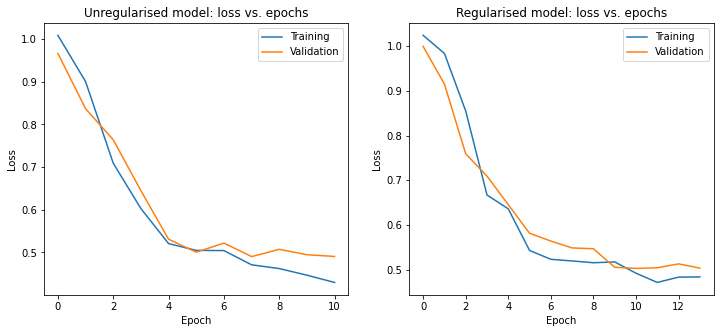

In [ ]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unreg_history.history['loss'])
plt.plot(unreg_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()